
<img src="bit_hd.jpg"/>

## <span style="color:red"> DEFINATION </span>: classification of cardiotocograms data for various  category of fetal state class applying  Decision Tree Algorithm.

## <span style="color:red">Prepared By</span>:     PRATIK VASAVA

# Prerequisites Python libraries

#### Pandas(https://pandas.pydata.org/getpandas.html) =Library for data data manipulation and analysis.
#### Matplolib(https://matplotlib.org/)=Library for to performe mathamtical oprations.
##### numpy(http://www.numpy.org/)=Library  NumPy is a general-purpose array-processing package. 


## Dicision Tree Algorith:

    -The decision tree algorithm tries to solve the problem, by using tree representation. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label.

## Importing Libararies

In [40]:
#Loadindg all necessary python libraries.python version(v3.7).
#data manipulation and analysis
import pandas as pd
#scientific computing 
import numpy as np
#visulatition 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#import roc_curve
from sklearn.metrics import confusion_matrix
#from sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.model_selection import train_test_split 


## Load dataset

In [41]:
dataset = pd.read_excel("house-prices-advanced-regression-techniques_for_regression/CTG.xls", sheetname="Raw Data")
#The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms 
#classified by expert obstetricians.



C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [42]:
#Observe data in file.
dataset.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [43]:
#Getting information of total number of Rows and Columns in file.
dataset.shape

(2130, 40)

### Data Cleaning

In [44]:
file=dataset.copy()

In [45]:
#removing unrelavant columns from dataset.
file=file.drop(columns=['FileName'],axis=1)


In [46]:

#Droping unnecessary entry from dataset.
file=file.drop(file.index[0])

file.head()

,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [47]:

file=file.drop(columns=[ 'SegFile', 'Date'])

In [48]:
data=file.copy()

## EDA

In [49]:
#Look into dataset.exploring frist five record in dataset. 
data.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [50]:
#Looking last five records in dataset.
data.tail()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
2125,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,74.0,0.4,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2129,NaN,NaN,NaN,NaN,NaN,564.0,23.0,87.0,7.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data['CLASS'].unique()

array([ 9.,  6.,  2.,  8., 10.,  7.,  1.,  3.,  5.,  4., nan])

In [52]:
class_counts=[]
for count in data.columns:
    val=len(data[count].unique())
    class_counts.append(val)
print(class_counts)


[980, 1065, 49, 49, 23, 97, 20, 76, 58, 88, 250, 16, 3, 6, 2, 155, 110, 87, 19, 10, 89, 104, 96, 134, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 11, 4]


In [53]:
#Brief information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 1 to 2129
Data columns (total 37 columns):
b           2126 non-null float64
e           2126 non-null float64
LBE         2126 non-null float64
LB          2126 non-null float64
AC          2126 non-null float64
FM          2127 non-null float64
UC          2127 non-null float64
ASTV        2127 non-null float64
MSTV        2127 non-null float64
ALTV        2127 non-null float64
MLTV        2127 non-null float64
DL          2128 non-null float64
DS          2128 non-null float64
DP          2128 non-null float64
DR          2128 non-null float64
Width       2126 non-null float64
Min         2126 non-null float64
Max         2126 non-null float64
Nmax        2126 non-null float64
Nzeros      2126 non-null float64
Mode        2126 non-null float64
Mean        2126 non-null float64
Median      2126 non-null float64
Variance    2126 non-null float64
Tendency    2126 non-null float64
A           2126 non-null float64
B        

In [54]:
#Last three record having 'NaN' values for all features so,slicing out(removing) from datase
data=data.iloc[:2126, :]

# Feature explanied.

            - LB                     FHR baseline (beats per minute)
    
             -AC                     Number of accelerations per second
        
             -FM                     Number of fetal movements per second
            
             -UC                     Number of uterine contractions per second
            
             -DL                     Number of of light decelerations per second
            
             -DC                     Number of severe decelerations per second
            
             -DP                     Number of of prolongued decelerations per second
            
             -ASTV                     percentage of time with abnormal short term variability

             -MSTV                     mean value of short term variability
            
             -CLASS                    FHR pattern class code (1 to 10)
            
             -NSP                      fetal state class code (N=normal; S=suspect; P=pathologic)-#Target class

            


# In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(NSP)


## Missing values

In [55]:
#checking totla number of missing vallues in variabls.
data.isnull().sum()

b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

### Handling NaN values:

In [56]:
data.dropna()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6,0.0,953.0,134.0,134.0,1.0,0.0,10.0,26.0,5.9,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,240.0,953.0,134.0,134.0,1.0,0.0,9.0,29.0,6.3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
8,62.0,679.0,122.0,122.0,0.0,0.0,0.0,83.0,0.5,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,120.0,779.0,122.0,122.0,0.0,0.0,1.0,84.0,0.5,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
10,181.0,1192.0,122.0,122.0,0.0,0.0,3.0,86.0,0.3,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


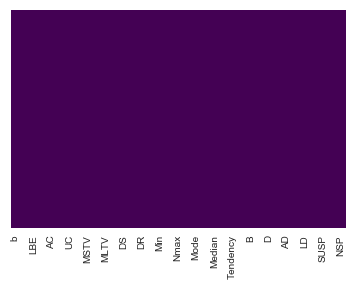

In [57]:

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
class_counts=[]
for count in data.columns:
    val=len(data[count].unique())
    class_counts.append(val)
print(class_counts)

[979, 1064, 48, 48, 22, 96, 19, 75, 57, 87, 249, 15, 2, 5, 1, 154, 109, 86, 18, 9, 88, 103, 95, 133, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 10, 3]


In [59]:
#checking NaN values from last three columns after removing.

data.tail()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
2122,2059.0,2867.0,140.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,1576.0,2867.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,1576.0,2596.0,140.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,74.0,0.4,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


->  Removed successfully.

In [60]:
#sns.pairplot(data)

# Numerical Variables.


In [61]:
list1=data.columns
data[list(list1)] = data[list(list1)].fillna(0.0).astype(int)
data.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240,357,120,120,0,0,0,73,0,43,...,0,0,0,0,0,0,1,0,9,2
2,5,632,132,132,4,0,4,17,2,0,...,0,0,0,1,0,0,0,0,6,1
3,177,779,133,133,2,0,5,16,2,0,...,0,0,0,1,0,0,0,0,6,1
4,411,1192,134,134,2,0,6,16,2,0,...,0,0,0,1,0,0,0,0,6,1
5,533,1147,132,132,4,0,5,16,2,0,...,0,0,0,0,0,0,0,0,2,1


In [62]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()
     


Number of numerical variables:  37


,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240,357,120,120,0,0,0,73,0,43,...,0,0,0,0,0,0,1,0,9,2
2,5,632,132,132,4,0,4,17,2,0,...,0,0,0,1,0,0,0,0,6,1
3,177,779,133,133,2,0,5,16,2,0,...,0,0,0,1,0,0,0,0,6,1
4,411,1192,134,134,2,0,6,16,2,0,...,0,0,0,1,0,0,0,0,6,1
5,533,1147,132,132,4,0,5,16,2,0,...,0,0,0,0,0,0,0,0,2,1


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.



In [63]:
#sns.pairplot(data)

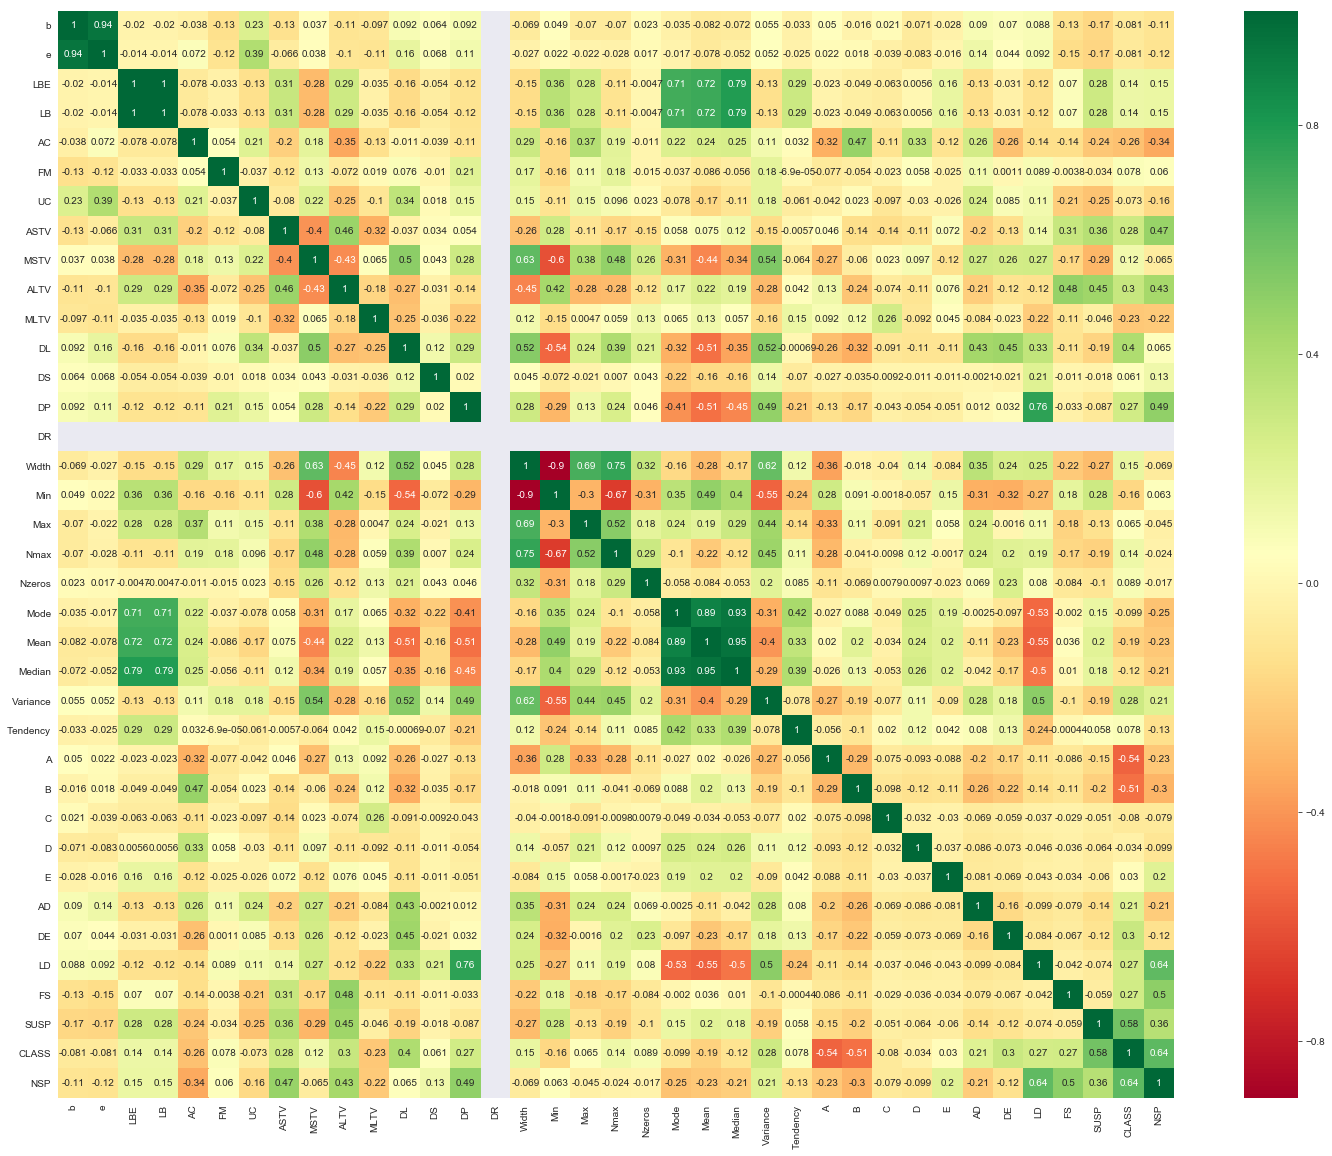

In [64]:

#get correlations of each features in dataset
coral = data.corr()
top_corr_features = coral.index
plt.figure(figsize=(25,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### NOTE:Dataset have all numerical variables

In [65]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<5]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


In [66]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 23


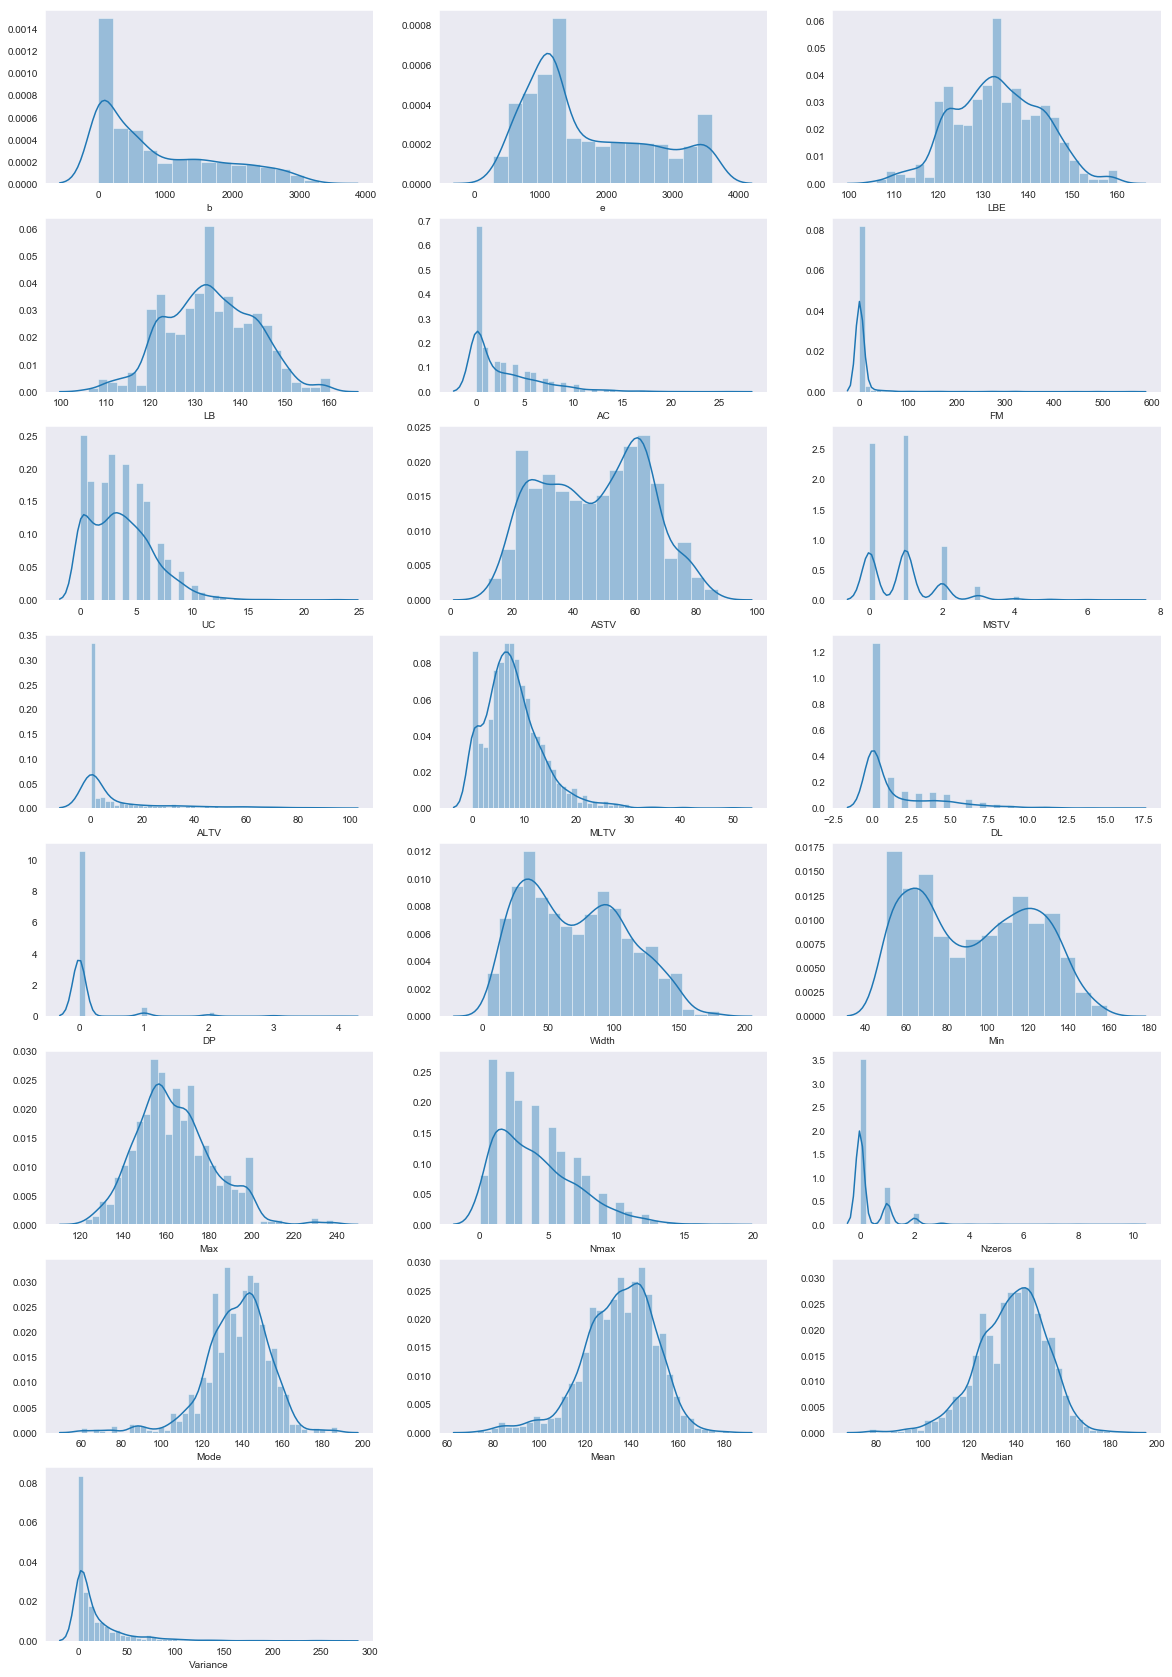

In [67]:
#Histograme for observe distrubution of continuos variables.
col=data[continuous_feature].columns
fig=plt.figure(figsize=(20,30))
i=0
x=len(data[continuous_feature].columns)
for i in range(x-1):
    i=i
    z=(col[i])
    #print(z)
    sns.set_style("dark")
    fig.add_subplot(8,3,i+1)
    sns.distplot(data[z])
    #plt.title(dataset[z])
    
    
        
plt.show()

23


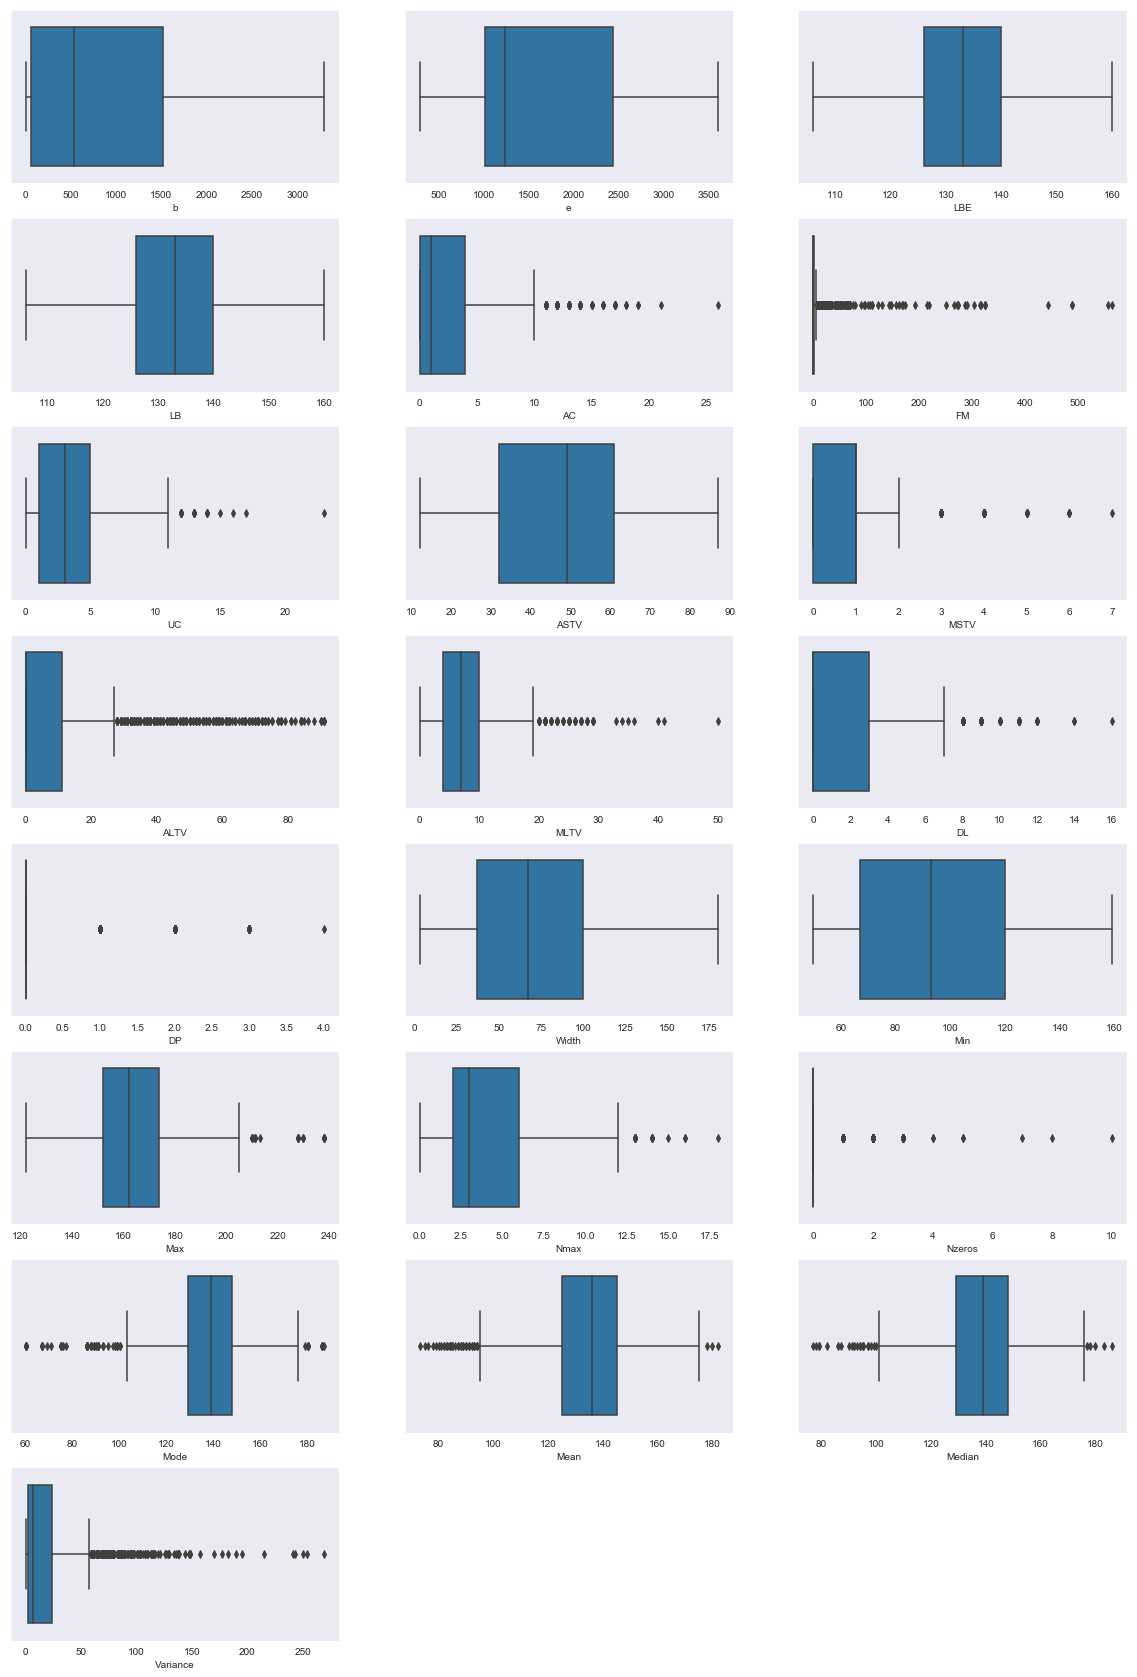

In [68]:
#Outlier
col=data[continuous_feature].columns
fig=plt.figure(figsize=(20,30))
i=0
x=len(data[continuous_feature].columns)
print(x)
if (x%3)==0:
    h1=x/3
    #print('from first',h1)
    
else:
    h1=str(x/3)
    za=h1.split('.')
    vf=int(za[0])
    h1=vf+1
    #print('second',h1)
for i in range(x-1):
    i=i
    z=(col[i])
    #print(z)
    sns.set_style("dark")
    fig.add_subplot(h1,3,i+1)
    
    sns.boxplot(data[z])
    #plt.title(dataset[z])
   
    
        
plt.show()

In [69]:
Q1 = data.quantile(0.25)
Q3 =data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

b           1466.00
e           1425.75
LBE           14.00
LB            14.00
AC             4.00
FM             2.00
UC             4.00
ASTV          29.00
MSTV           1.00
ALTV          11.00
MLTV           6.00
DL             3.00
DS             0.00
DP             0.00
DR             0.00
Width         63.00
Min           53.00
Max           22.00
Nmax           4.00
Nzeros         0.00
Mode          19.00
Mean          20.00
Median        19.00
Variance      22.00
Tendency       1.00
A              0.00
B              1.00
C              0.00
D              0.00
E              0.00
AD             0.00
DE             0.00
LD             0.00
FS             0.00
SUSP           0.00
CLASS          5.00
NSP            0.00
dtype: float64


In [70]:

(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
7,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [71]:

data=data[~((data< (Q1 - 1.5 * IQR)) |(data> (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(355, 37)

23


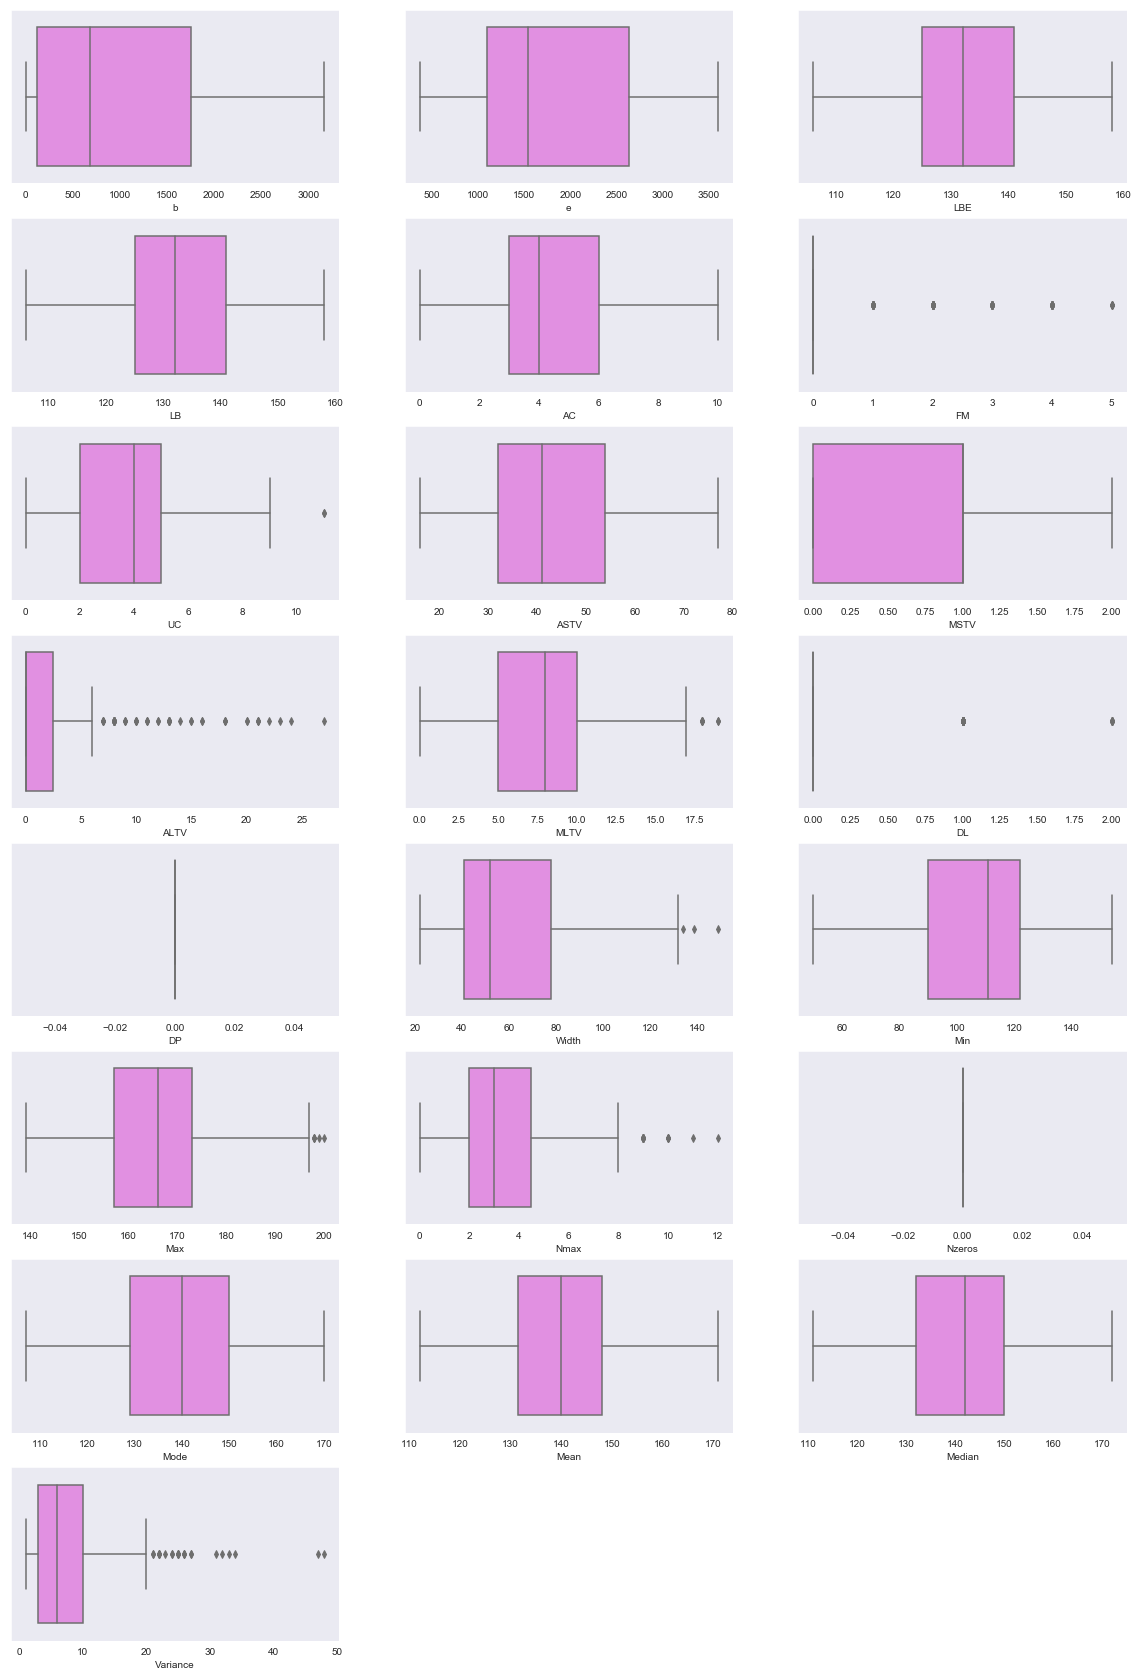

In [72]:
col=data[continuous_feature].columns
fig=plt.figure(figsize=(20,30))
i=0
x=len(data[continuous_feature].columns)
print(x)
if (x%3)==0:
    h1=x/3
    #print('from first',h1)
    
else:
    h1=str(x/3)
    za=h1.split('.')
    vf=int(za[0])
    h1=vf+1
    #print('second',h1)
for i in range(x-1):
    i=i
    z=(col[i])
    #print(z)
    sns.set_style("dark")
    fig.add_subplot(h1,3,i+1)
    
    sns.boxplot(data[z],color='violet')
    #plt.title(dataset[z])
   
    
        
plt.show()

In [73]:
data['CLASS'].unique()

array([2], dtype=int64)

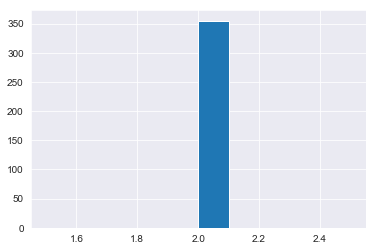

In [74]:
data['CLASS'].hist()

In [75]:
x1=data.iloc[:,:-1]


y1=data['NSP']

In [76]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor(n_estimators=20)
model.fit(x1,y1)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [77]:
print(model.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [78]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
#sns.line(feat_importances)
#plt.plot( feat_importances, dataset['Petrol_Consumption'], marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
#plt.legend()
#col=['Green','Blue','Yellow','Red']
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

AttributeError: 'int' object has no attribute 'columns'

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
#d=feat_importances.nlargest(10).index
#print(d)
x=data[['CLASS', 'LD', 'FS', 'SUSP', 'E', 'DP', 'DE', 'e', 'Mean', 'ALTV']].values
y=data['NSP'].values


In [ ]:
#Model
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02,random_state=0)

In [ ]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train,y_train)

In [ ]:
#lets predict  'TEST' values according to classifier
y_pred=dtc.predict(x_test)

In [ ]:
#comparing actual and predicted values.
asd=pd.DataFrame({'Actual':y_test,'predicted':y_pred})

In [ ]:
#lets check how comparition seen
asd.head()

In [ ]:
plt.figure(figsize=(7,7))
col=['orange']
asd.hist(color=col)

In [ ]:
#importing library for confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
#confusion matrix 
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred))     # accuracy of model(no.of 0-0 and 1-1)
print("Precision:",metrics.precision_score(y_test, y_pred))        
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [39]:
'''
length=19
if (length%3)==0:
    h1=length/3
    print('from first',h1)
    
else:
    h1=str(length/3)
    za=h1.split('.')
    vf=int(za[0])
    h1=vf+1
    print('second',h1)
    '''

"\nlength=19\nif (length%3)==0:\n    h1=length/3\n    print('from first',h1)\n    \nelse:\n    h1=str(length/3)\n    za=h1.split('.')\n    vf=int(za[0])\n    h1=vf+1\n    print('second',h1)\n    "